# Dependencies


In [61]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
import torchvision.transforms as standard_transforms
from torch.utils.data import DataLoader
from voc import VOC

import numpy as np

torch.manual_seed(2025)

# Mapping Class to Color


In [62]:
"""
color map
0=background, 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle # 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=diningtable,
12=dog, 13=horse, 14=motorbike, 15=person # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
"""

noToClass = {
    0: "background",
    1: "aeroplane",
    2: "bicycle",
    3: "bird",
    4: "boat",
    5: "bottle",
    6: "bus",
    7: "car",
    8: "cat",
    9: "chair",
    10: "cow",
    11: "dining table",
    12: "dog",
    13: "horse",
    14: "motorbike",
    15: "person",
    16: "potted plant",
    17: "sheep",
    18: "sofa",
    19: "train",
    20: "tv/monitor",
}

palette = [
    0,
    0,
    0,
    128,
    0,
    0,
    0,
    128,
    0,
    128,
    128,
    0,
    0,
    0,
    128,
    128,
    0,
    128,
    0,
    128,
    128,
    128,
    128,
    128,
    64,
    0,
    0,
    192,
    0,
    0,
    64,
    128,
    0,
    192,
    128,
    0,
    64,
    0,
    128,
    192,
    0,
    128,
    64,
    128,
    128,
    192,
    128,
    128,
    0,
    64,
    0,
    128,
    64,
    0,
    0,
    192,
    0,
    128,
    192,
    0,
    0,
    64,
    128,
]  # 3 values- R,G,B for every class. First 3 values for class 0, next 3 for

"""
    Convert palette to map class number to RGB color.

    Expected output, python dictionary with 21 integer keys, each value being a array of size 3
"""
dicti = {}
c = 0
for i in range(0, len(palette), 3):
    dicti[c] = palette[i : i + 3]
    c += 1

palette = dicti

# DataLoading


In [63]:
img_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
mask_transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

In [64]:
batch_size = 1
DS = VOC("val", img_transform, mask_transform)
DL = DataLoader(DS, batch_size=batch_size, shuffle=True)
first_batch = iter(DL)

In [65]:
imgs, msks = [], []
for _ in range(5):
    img, msk = next(first_batch)
    imgs.append(img)
    msks.append(msk)

# Show Image


In [66]:
def makeImagesPlotReady(msk, channels=3):
    """
    Similar to how we converted the images, make the mask tensor matplotlib ready

    args:
        msk or img - input mask tensor of shape [1, 3, 224, 224] or numpy of shape (3, 224, 224)
    returns:
        mask/img - mask that is ready to be plotted using matplotlib.
                    Hint: Numpy class of shape (224, 224, 3)
    """

    return np.rot90(np.rot90(np.rot90((msk.reshape(channels, 224, 224)).T)))

In [67]:
output_images = [makeImagesPlotReady(img, 3) for img in imgs]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.64].


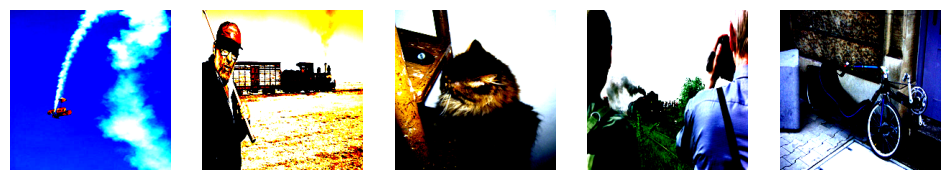

In [68]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_images)):
    axs[i].imshow(output_images[i])
    axs[i].axis("off")
plt.show()

# Show Ground Truth Mask


In [69]:
def convertMaskToRGB(msk):
    """
    Given a msk, convert it into rgb for visulization.
    """
    # msk = (msk * 255).int()
    msk[msk == 255] = 0
    msk = msk.reshape((224, 224))

    mask_rgb = np.zeros(
        (3, 224, 224), dtype=np.uint8
    )  # Empty array to store RGB of each class

    for idx, color in palette.items():  # Converting to colors
        for j in range(3):  # R,G,B
            mask_rgb[j][msk == idx] = color[j]

    return mask_rgb

In [70]:
output_msks = [makeImagesPlotReady(convertMaskToRGB(msk), 3) for msk in msks]

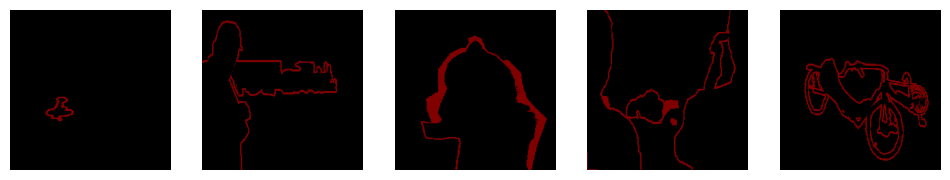

In [71]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].axis("off")
plt.show()

# Plot Image with the mask


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.64].


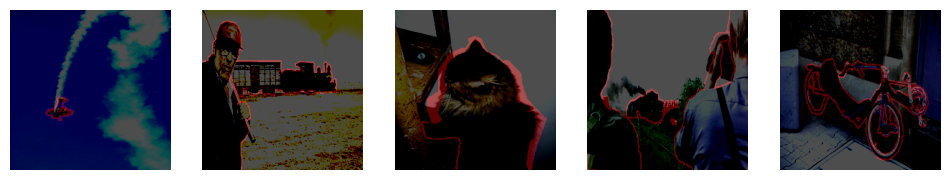

In [72]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha=0.7)
    axs[i].axis("off")
plt.show()

Visualizing our Model's Predicted Mask


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


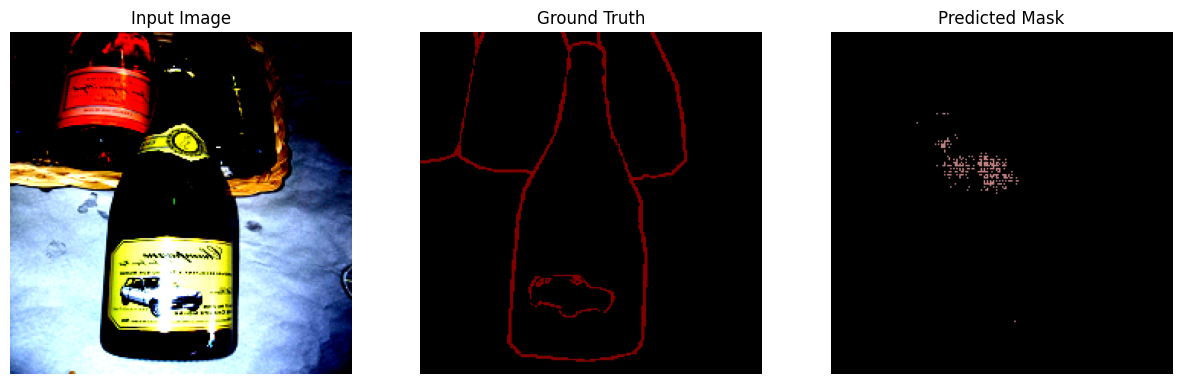

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


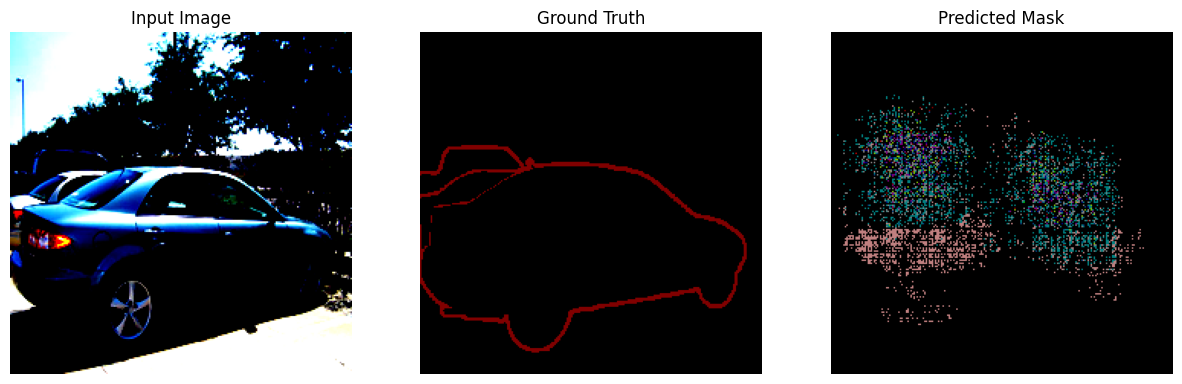

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7925336..2.64].


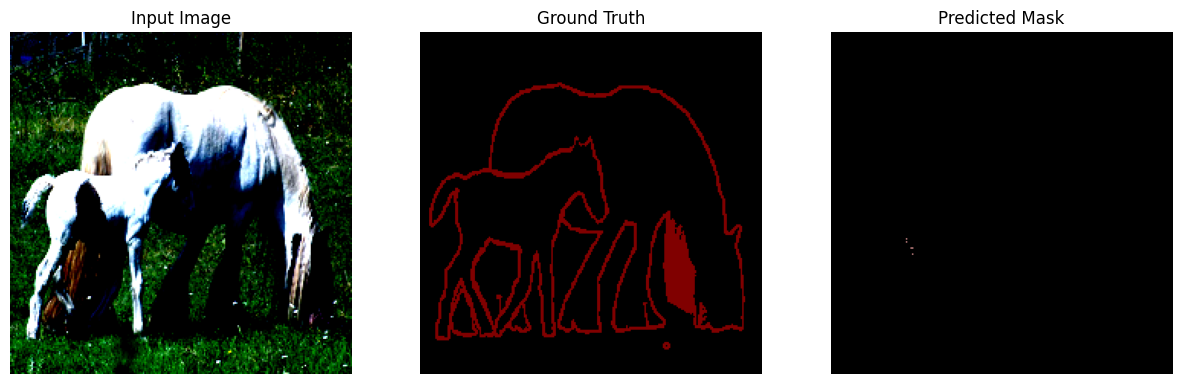

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


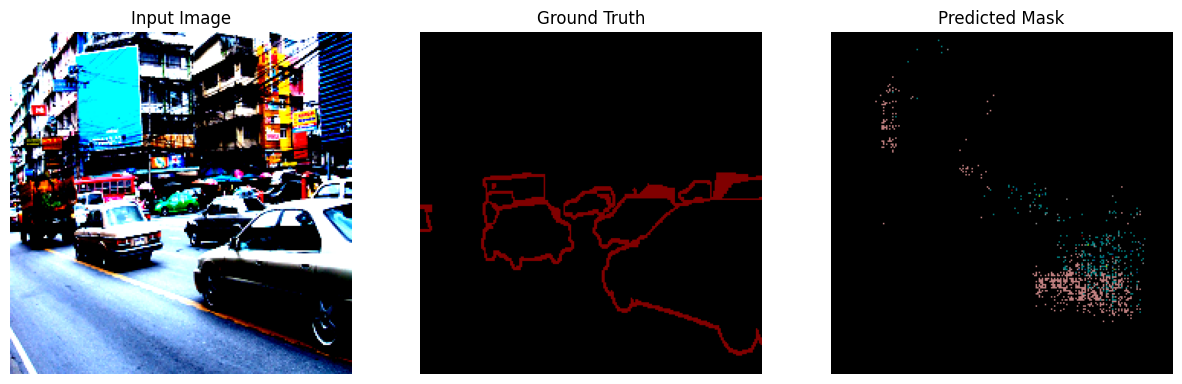

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


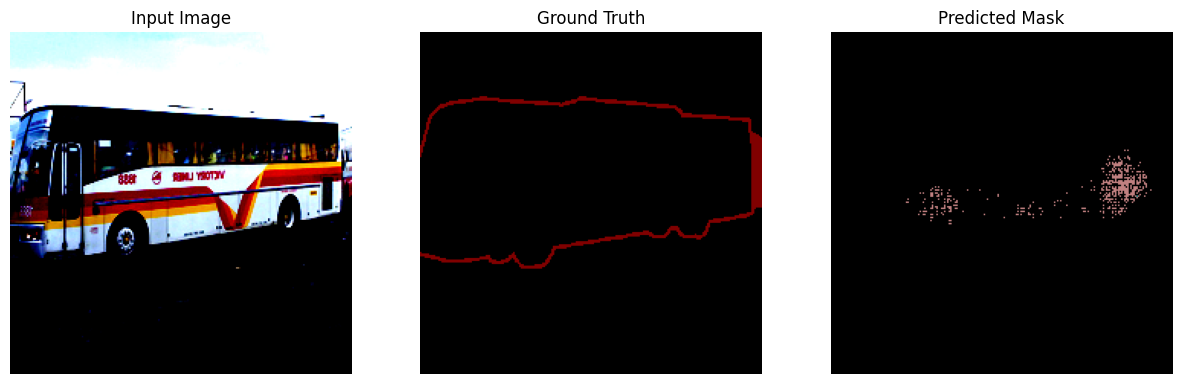

In [73]:
import torch
from basic_fcn import FCN
import voc
import matplotlib.pyplot as plt
import numpy as np

# Define the model architecture
n_class = 21
fcn_model = FCN(n_class=n_class)

# Define the device (CUDA if available, else CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the saved weights and map them to the correct device
saved_model_path = "best_model.pth"
fcn_model.load_state_dict(torch.load(saved_model_path, map_location=device))

# Set the model to evaluation mode
fcn_model.eval()

# Move the model to the appropriate device (it is already mapped in load_state_dict, but we ensure this step is clear)
fcn_model = fcn_model.to(device)


fcn_model.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(DL):
        inputs = inputs.to(device)
        outputs = fcn_model(inputs)
        pred = torch.argmax(outputs, dim=1).cpu().numpy()
        
        # Convert predictions to RGB
        pred_rgb = convertMaskToRGB(pred)
        
        # Convert ground truth to RGB
        labels_rgb = convertMaskToRGB(labels.cpu().numpy())
        
        # Plot the results
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(makeImagesPlotReady(inputs.cpu().numpy()[0], 3))
        axs[0].set_title('Input Image')
        axs[0].axis('off')
        
        axs[1].imshow(makeImagesPlotReady(labels_rgb, 3))
        axs[1].set_title('Ground Truth')
        axs[1].axis('off')
        
        axs[2].imshow(makeImagesPlotReady(pred_rgb, 3))
        axs[2].set_title('Predicted Mask')
        axs[2].axis('off')
        
        plt.show()
        
        if i == 4:  # Show only the first 5 images
            break